 # <font color=magenta>INDIVIDUAL ASSIGNMENT - TITANIC DATASET </font>

## Part I: Exploratory analysis

In [3]:
import pandas as pd
import numpy as np

#### 1. Read the dataset correctly using pandas, using an appropriate column as index

In [4]:
df = pd.read_csv('train.csv', index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# In order to check if the chosen column for the index is appropiate we check if it's unique
df.index.is_unique

True

In [6]:
# In order to check if the chosen column for the index is appropiate we check if it's monotonic. This might be more appropiate 
# for time series data, however, given that it is true, this might tell us that this column is indeed some kind of recid. 
df.index.is_monotonic

True

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers

In [406]:
# we divide the number of people who survived against the total number of records

Pct_survivors = len(df[df["Survived"] == 1])/len(df)
print('The percentage of survivors out of total number of passengers is:','{0:.0f}%'.format(Pct_survivors*100))


The percentage of survivors out of total number of passengers is: 38%


In [409]:
# we count the number of passengers per sex and then divide by the amount of people.

Pct_by_sex = df.groupby('Sex')['Sex'].count()/len(df)

print('the percentage of men and women out of total number of passengers is', '{0:.0f}%'.format(Pct_by_sex[1]*100), 'and '
      '{0:.0f}%'.format(Pct_by_sex[0]*100),'respectively')

the percentage of men and women out of total number of passengers is 65% and 35% respectively


#### 3. Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women) 

3.1 first option: divide number of survivors of each gender by total amount of passengers. However, in my opionion this approach could be a little misleading given that the number of male passengers doubles that of female's. 

In [410]:
# we subset the people who survivedand count the number of passengers per sex, then divide by the total number 
# passengers.

Pct_survivors_sex1 = df[df["Survived"] == 1].groupby('Sex')['Survived'].count()/len(df)

for i, j in enumerate(Pct_survivors_sex1):
    print('The % of', Pct_survivors_sex1.index[i], 'survivors is', '{0:.0f}%'.format(Pct_survivors_sex1[i]*100))

The % of female survivors is 26%
The % of male survivors is 12%


3.2 second option: divide number of survivors of each gender by the total passenger per gender. In order to really portray the proportion of survivors by gender, I think it's best to based on the number of passengers per gender.

In [8]:
# count the number of passengers per sex and survived category (0,1) and then pivot the table dividing 
# by columns the survival, not survival

Pct_survivors_sexTmp = df.groupby(['Sex','Survived'])['Survived'].count().unstack()

# We divide the column survived (1) by the total number of passengers per sex

Pct_survivors_sex2 = Pct_survivors_sexTmp[1].div(Pct_survivors_sexTmp.sum(axis=1))

for i, j in enumerate(Pct_survivors_sex2):
    print('The % of', Pct_survivors_sex2.index[i], 'survivors is', '{0:.0f}%'.format(Pct_survivors_sex2[i]*100))


The % of female survivors is 74%
The % of male survivors is 19%


3.3 the sex distribution of survivors 

In [419]:
# we recycle the series built in the previous point and divide the survivors per sex (column 1) by the total number of survivors
Pct_survivors_sex3 = Pct_survivors_sexTmp[1].div(Pct_survivors_sexTmp[1].sum(axis=0))

for i, j in enumerate(Pct_survivors_sex3):
    print('The % of', Pct_survivors_sex3.index[i], 'survivors is', '{0:.0f}%'.format(Pct_survivors_sex3[i]*100))


The % of female survivors is 68%
The % of male survivors is 32%


#### 4. Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving

In [421]:
# we recycle the series built in the previous point and convert it to dataframe

df4 = pd.DataFrame(Pct_survivors_sexTmp.values, columns = ['Non survivor','Survivor'], index = Pct_survivors_sexTmp.index)

# then, to get the probability, we divide each cell byt the total number of passengers or records.

Pct_survivors_sex4 = df4/len(df)

Pct_survivors_sex4

,Non survivor,Survivor
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


#### 5. Display in a DataFrame the probability of survival/not survival of all combinations of sex and class

In [210]:
Pct_survivors_sexTmp = df.groupby(['Sex','Pclass','Survived'])['Survived'].count().unstack()

df5 = pd.DataFrame(Pct_survivors_sexTmp.values, columns = ['No survivor','Survivor'], index = Pct_survivors_sexTmp.index)

df5 = df5/len(df)

df5

No survivor  Survivor
Sex    Pclass                       
female 1          0.003367  0.102132
       2          0.006734  0.078563
       3          0.080808  0.080808
male   1          0.086420  0.050505
       2          0.102132  0.019080
       3          0.336700  0.052750

## Part II: Imputing missing values

Devise some strategy to impute the missing values in the Age column.

Some basic ideas (that should be improved):
- Fill all the missing values with random values (very bad!)
- Fill all the missing values with the average age of the whole dataset (bad!)
- Fill all the missing values with the median age (so so)

Dataset fields:
- Survived
- Pclass
- Sex
- Age
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Cabin
- Embarked: Port of Embarkation

In [211]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### First we analize a little the columns, to check the distributions of the missing values amongst the columns

In [305]:
#Count number of missing values in column age
df['Age'].isna().sum()

177

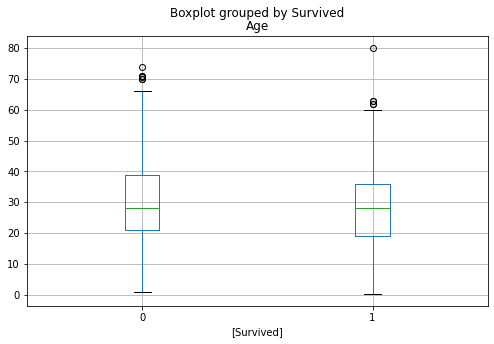

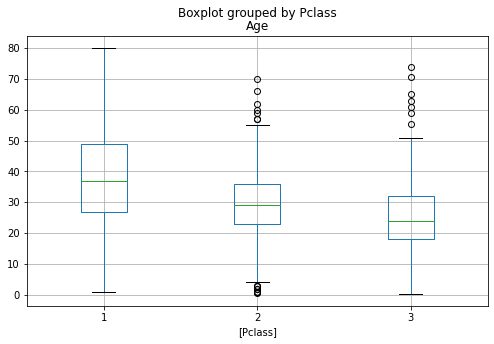

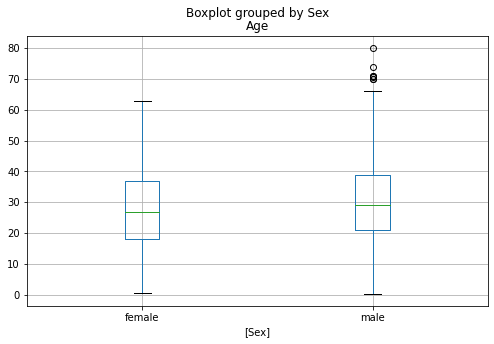

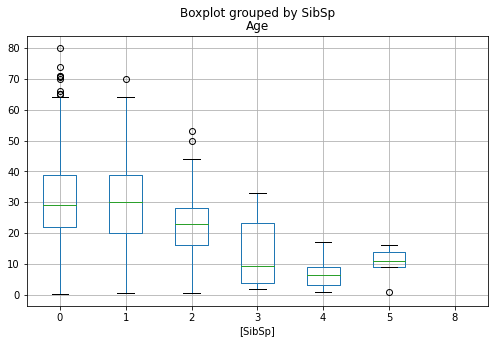

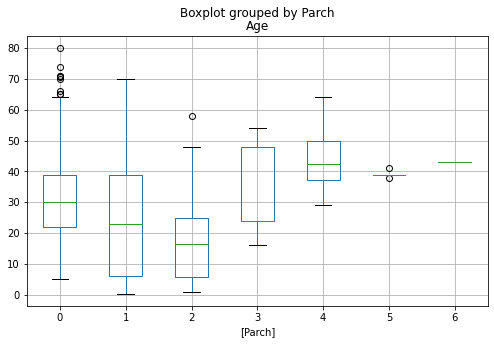

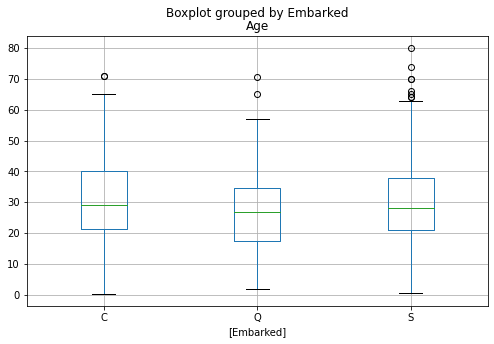

In [354]:
#Age distribution per column
columns = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']

for i in columns:
    df.boxplot(by = [i], column = ['Age'],figsize=(8, 5))

- People who survived are slightly younger than the one's who didn't except for some outliers
- People in first class were on average older than the ones in second class and the ones in third class.
- Male are slightly older than female
- Passengers with 1, 2 or 3 siblings or spouses seem to be older than the ones with more siblings or spouses
- Passengers with 2 parents / children aboard have a wider range of ages compared to the other ones, and eventhough it varies across the different categories, overall people with 2 parent or children aboard are the youngest and people with 3, 4 and 5 parents or children are the oldest.
- People who embarked in Queenstown seem to be slightly younger than the ones who embarked in Southampton, and in the same way, people who embarked at Southampton are slightly younger that people who embarked at Cherbourg.

#### We check the proportion of people with age null that belongs to each of the columns to try to see a better way to input the null values. 
#### Columns = Survived, Pclass, Sex, SibSp, Parch, Embarked

In [365]:
df_nulls = df.loc[df['Age'].isna()]

In [368]:
df_nulls['Pclass'].value_counts()/len(df_nulls)

3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64

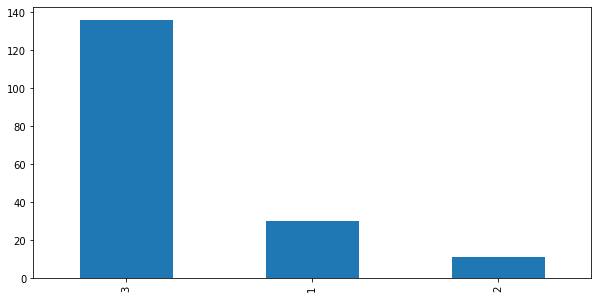

In [369]:
df_nulls['Pclass'].value_counts().plot(kind='bar',  figsize=(10,5))

Records with age Null belonged mostly to the third class

In [370]:
df_nulls['Sex'].value_counts()/len(df_nulls)

male      0.700565
female    0.299435
Name: Sex, dtype: float64

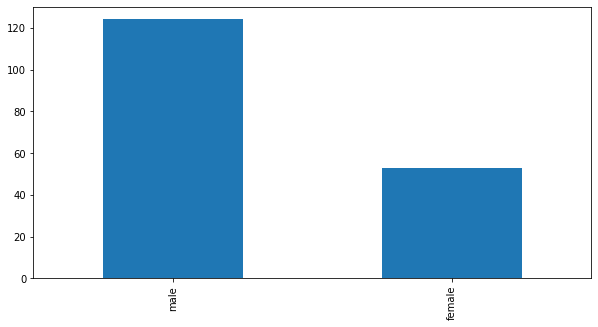

In [330]:
df_nulls['Sex'].value_counts().plot(kind='bar',  figsize=(10,5))

records with null age values are mostly males

In [371]:
df_nulls['SibSp'].value_counts()/len(df_nulls)

0    0.774011
1    0.146893
8    0.039548
3    0.022599
2    0.016949
Name: SibSp, dtype: float64

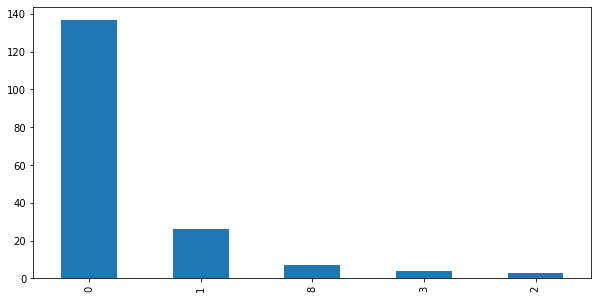

In [372]:
df_nulls['SibSp'].value_counts().plot(kind='bar',  figsize=(10,5))

Age null records mostly belong to people with no siblings or spouses

In [373]:
df_nulls['Parch'].value_counts()/len(df_nulls)

0    0.887006
2    0.067797
1    0.045198
Name: Parch, dtype: float64

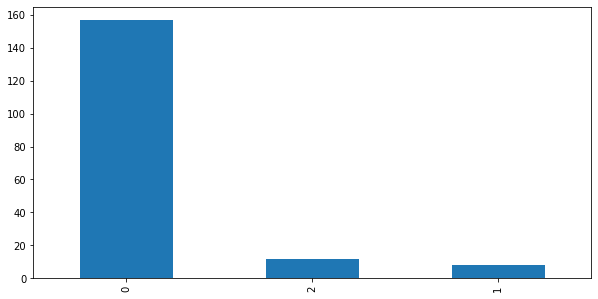

In [374]:
df_nulls['Parch'].value_counts().plot(kind='bar',  figsize=(10,5))

Age null values mostly belong to people with no parents or childern

In [375]:
df_nulls['Embarked'].value_counts()/len(df_nulls)

S    0.508475
Q    0.276836
C    0.214689
Name: Embarked, dtype: float64

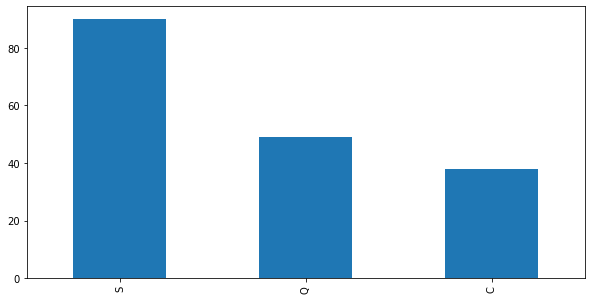

In [376]:
df_nulls['Embarked'].value_counts().plot(kind='bar',  figsize=(10,5))

The majority of people with agen null records mostly embarked on S

#### - Given the above, it might make sense to inpute values based on the passenger boarding class, the number of siblings/spouses, and the number or parents/childerns, since amongst this columns there seems to be a difference in the distribution of ages and, given that the majority that the records with null values belong to the third class, people with 0 siblings/spouses and people with 0 children/parents, it might be good to input the values according to the median in each of the classes
#### - We use the median since it's overall a more robust measure 

In [441]:
df_ageImputed = df.copy()
df_ageImputed['Age'] = df.groupby(['Pclass', 'SibSp','Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

# THE END, THANK YOU

## Eleonora Jiménez Pulido